# 2020 IT SALARY SURVEY IN EUROPEAN REGION.

This is an Exploratory Data Analysis performed on the "IT Salary Survey for EU region(2018-2020) dataset"
This dataset can be found through the following link https://www.kaggle.com/parulpandey/2020-it-salary-survey-for-eu-region 

In [505]:
# Importing the required libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [506]:
# Reading the dataset
df_sv20 = pd.read_csv(r"C:\Users\Hermis\Downloads\archive (2)/IT Salary Survey EU  2020.csv")

In [507]:
# Viewing the 2020 dataset
df_sv20

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",...,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,...,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",...,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",...,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0


In [508]:
# Checking the datatype and Non-Null count
df_sv20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

Before we start our cleaning process, lets fast make a copy of our datset

In [509]:
#Making copies of our datasets


df_sv20a =df_sv20.copy()


Some column names are long and do not conform to python naming standards, so our first step is we rename the columns

### 1. Renaming the columns

In [510]:
df_sv20a.rename(columns={'Total years of experience': 'experience',
                   'Years of experience in Germany': 'germany_experience',
                   'Position ' : 'position',
                   'Seniority level': 'seniority_level',
                   'Your main technology / programming language':'Main_PL',
                   'Other technologies/programming languages you use often':'other_PL',
                   'Yearly brutto salary (without bonus and stocks) in EUR':'yearly_gross_salary_in_EUR',
                   'Yearly bonus + stocks in EUR': 'yearly_bonus_&_stocks_in_EUR',
                   'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country': 'annual_gross_salary_without_bonus_and_stock_one_year_ago',
                   'Annual bonus+stocks one year ago. Only answer if staying in same country': 'annual_bonus_&_stocks_one_year_ago',
                   'Number of vacation days': 'vacation_days',
                   'Employment status':'employment_status',
                   'Сontract duration': 'contract_duration',
                   'Main language at work': 'main_language_at_work',
                   'Company size' : 'company_size',
                   'Company type':'company_type',
                   'Have you lost your job due to the coronavirus outbreak?' : 'lost_job_covid',
                   'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week' :'shorter_working_week_hours_perweek_(kurzabeit)',
                   'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR' : 'work_from_home_monitory_support_in_EUR'},

          inplace=True, errors='raise')

In [511]:

df_sv20a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Timestamp                                                 1253 non-null   object 
 1   Age                                                       1226 non-null   float64
 2   Gender                                                    1243 non-null   object 
 3   City                                                      1253 non-null   object 
 4   position                                                  1247 non-null   object 
 5   experience                                                1237 non-null   object 
 6   germany_experience                                        1221 non-null   object 
 7   seniority_level                                           1241 non-null   object 
 8   Main_PL           

In [512]:
# Lets check if wwe have duplicated data.
df_sv20a.duplicated().sum()

0

There are no duplicates on our dataset.

In [513]:
# Checking the count for null values in the dataset
df_sv20a.isna().sum()

Timestamp                                                     0
Age                                                          27
Gender                                                       10
City                                                          0
position                                                      6
experience                                                   16
germany_experience                                           32
seniority_level                                              12
Main_PL                                                     127
other_PL                                                    157
yearly_gross_salary_in_EUR                                    0
yearly_bonus_&_stocks_in_EUR                                424
annual_gross_salary_without_bonus_and_stock_one_year_ago    368
annual_bonus_&_stocks_one_year_ago                          639
vacation_days                                                68
employment_status                       

From the assesment above we can note that some coulmns have a lot of empty spaces. This is because some of the questions were optional, we are going to drop the columns with optional questions, so that we can perform a holistic EDA.
Furthermore, we shall drop columns which we wont use on our EDA.


In [514]:
df_sv20a.drop(['Timestamp','germany_experience','other_PL','annual_gross_salary_without_bonus_and_stock_one_year_ago', 'annual_bonus_&_stocks_one_year_ago', 'shorter_working_week_hours_perweek_(kurzabeit)', 'work_from_home_monitory_support_in_EUR', 'yearly_bonus_&_stocks_in_EUR'], axis=1, inplace=True)

In [515]:
df_sv20a

,Age,Gender,City,position,experience,seniority_level,Main_PL,yearly_gross_salary_in_EUR,vacation_days,employment_status,contract_duration,main_language_at_work,company_size,company_type,lost_job_covid
0,26.0,Male,Munich,Software Engineer,5,Senior,TypeScript,80000.0,30,Full-time employee,Unlimited contract,English,51-100,Product,No
1,26.0,Male,Berlin,Backend Developer,7,Senior,Ruby,80000.0,28,Full-time employee,Unlimited contract,English,101-1000,Product,No
2,29.0,Male,Berlin,Software Engineer,12,Lead,Javascript / Typescript,120000.0,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes
3,28.0,Male,Berlin,Frontend Developer,4,Junior,Javascript,54000.0,24,Full-time employee,Unlimited contract,English,51-100,Startup,No
4,37.0,Male,Berlin,Backend Developer,17,Senior,C# .NET,62000.0,29,Full-time employee,Unlimited contract,English,101-1000,Product,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,31.0,Male,Berlin,Backend Developer,9,Senior,Java,70000.0,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes
1249,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,Senior,consumer analysis,60000.0,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No
1250,39.0,Male,Munich,IT Operations Manager,15,Lead,PHP,110000.0,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No
1251,26.0,Male,Saarbrücken,Frontend Developer,7,Middle,JavaScript,38350.0,27,Full-time employee,Unlimited contract,German,101-1000,Product,No


Now that we have dropped the optional columns, Lets inspect the other columns One by one.

In [516]:
df_sv20a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1226 non-null   float64
 1   Gender                      1243 non-null   object 
 2   City                        1253 non-null   object 
 3   position                    1247 non-null   object 
 4   experience                  1237 non-null   object 
 5   seniority_level             1241 non-null   object 
 6   Main_PL                     1126 non-null   object 
 7   yearly_gross_salary_in_EUR  1253 non-null   float64
 8   vacation_days               1185 non-null   object 
 9   employment_status           1236 non-null   object 
 10  contract_duration           1224 non-null   object 
 11  main_language_at_work       1237 non-null   object 
 12  company_size                1235 non-null   object 
 13  company_type                1228 

Since Age column has Nan Values, we shall fill the empty spaces with the mean age.

In [517]:
# Filling the null values with the mean age. 
mean_value=df_sv20a['Age'].mean()

df_sv20a['Age'].fillna(value=mean_value, inplace=True)

In [518]:
# Confirming the existence of null values.
df_sv20a.Age.isna().sum()

0

In [519]:
df_sv20a.isna().sum()

Age                             0
Gender                         10
City                            0
position                        6
experience                     16
seniority_level                12
Main_PL                       127
yearly_gross_salary_in_EUR      0
vacation_days                  68
employment_status              17
contract_duration              29
main_language_at_work          16
company_size                   18
company_type                   25
lost_job_covid                 20
dtype: int64

In [520]:
# Lets fill the empty spaces on the gender column with 'unspecified'
df_sv20a['Gender'].fillna('Diverse', inplace = True)

In [521]:
# Confirming 
df_sv20a.Gender.value_counts()

Male       1049
Female      192
Diverse      12
Name: Gender, dtype: int64

In [522]:
#lets drop all the Null values 
df_sv20a.dropna(inplace= True)

In [523]:
df_sv20a.isna().sum()

Age                           0
Gender                        0
City                          0
position                      0
experience                    0
seniority_level               0
Main_PL                       0
yearly_gross_salary_in_EUR    0
vacation_days                 0
employment_status             0
contract_duration             0
main_language_at_work         0
company_size                  0
company_type                  0
lost_job_covid                0
dtype: int64

In [524]:
df_sv20a.City.unique()

array(['Munich', 'Berlin', 'Hamburg', 'Wolfsburg', 'Schleswig-Holstein',
       'Konstanz area', 'Frankfurt', 'Cologne', 'Kempten', 'Münster',
       'Mannheim ', 'Rosenheim', 'Stuttgart', 'Boeblingen', 'Düsseldorf',
       'Ingolstadt', 'Nürnberg', 'Ansbach', 'Leipzig', 'Mannheim',
       'Tuttlingen', 'Bonn', 'Moscow', 'Warsaw', 'Heidelberg', 'Aachen',
       'Karlsruhe ', 'Riga, Latvia', 'Dusseldorf', 'Helsinki', 'Würzburg',
       'Kiev', 'Den Haag', 'London', 'Amsterdam', 'Cracovia', 'Tallinn',
       'Prague', 'Utrecht', 'Stockholm', 'Braunschweig ', 'Dresden',
       'Kyiv', 'Stuttgart ', 'Malta', 'Lübeck', 'Nuremberg ', 'Bodensee',
       'Milan', 'Salzburg', 'Rome', 'Wroclaw', 'Karlsruhe', 'Cupertino',
       'Paris', 'Dublin ', 'Paderborn', 'Konstanz', 'Ulm', 'Barcelona',
       'Bölingen', 'Tampere (Finland)', 'Siegen', 'Minsk', 'Düsseldorf ',
       'Nuremberg', 'Marseille', 'Friedrichshafen', 'Hannover',
       'Walldorf', 'Eindhoven', 'France', 'Regensburg', 'Warsaw, Pola

In [525]:
# Lets query our dataset to find the city with 'prefer not to say'
df_sv20a.query('City=="Prefer not to say"')

,Age,Gender,City,position,experience,seniority_level,Main_PL,yearly_gross_salary_in_EUR,vacation_days,employment_status,contract_duration,main_language_at_work,company_size,company_type,lost_job_covid
1068,36.0,Male,Prefer not to say,ML Engineer,6,Senior,Python,110000.0,30,Full-time employee,Unlimited contract,English,101-1000,Startup,No


In [526]:
# Lets delete the row based on its index.
df_sv20a = df_sv20a.drop(index=1068)

In [527]:
# Confirming the changes
df_sv20a.query('City=="Prefer not to say"')

,Age,Gender,City,position,experience,seniority_level,Main_PL,yearly_gross_salary_in_EUR,vacation_days,employment_status,contract_duration,main_language_at_work,company_size,company_type,lost_job_covid


In [528]:
df_sv20a.position.unique()

array(['Software Engineer', 'Backend Developer', 'Frontend Developer',
       'DevOps', 'Data Engineer', 'Mobile Developer',
       'Software Architect', 'Team Lead', 'Test manager',
       'Product Manager', 'Data Scientist', 'Designer (UI/UX)',
       'Engineering Manager', 'Analytics engineer', 'QA Engineer',
       'Hardware Engineer', 'Reporting Engineer', 'agile master ',
       'ML Engineer', 'Solution Architect', 'BI Consultant',
       'Fullstack Developer', 'Cloud Architect', 'Network Engineer ',
       'VP Engineering', 'Scrum Master', 'Firmware Engineer',
       'Solutions Architect', 'Data Center Manager',
       'C/C++/Java developer', 'DevOps Manager', 'Network Administrator',
       'Consultant Data Analytics', 'BI IT Consultant', 'iOS Developer',
       'Cloud Engineer', 'Solutions architect', 'Stuttgart',
       'Senior Program Manager', 'DB developer/Data analyst',
       'Security Engineer', 'Business Analyst', 'DBA', 'Support Engineer',
       'Consultant', 'Testau

In [529]:
df_sv20a.experience.unique()

array(['5', '7', '12', '4', '17', '6', '8', '15', '2', '25', '14', '11',
       '30', '18', '13', '10', '3', '40', '26', '9', '19', '20', '5.5',
       '22', '16', '0.8', '1', '1.5', '21', '7.5', '2.5', '28', '29',
       '23', '1,5', '24', '0', '4.5', '27',
       '1 (as QA Engineer) / 11 in total', '2,5', '15, thereof 8 as CTO',
       '31', '3.5', 'less than year'], dtype=object)

The experience column is supposed to be only numerical values, but since some of the values contains strings, we shall repalce the string values with numerical where applicable. We shall also replace the commas on the number with a fullstop.
We shall also drop the column with 383 years beacause it sounds unrealistic.

Lastly we shall change the datatype of the column to float.

In [530]:
# Repacing the non-numerical values with numericals.
df_sv20a.experience = df_sv20a.experience.str.replace(',','.')
df_sv20a.experience = df_sv20a.experience.replace('1 (as QA Engineer) / 11 in total','11') \
                             .replace('6 (not as a data scientist. but as a lab scientist)', '6') \
                             .replace('less than year','0') \
                             .replace('15. thereof 8 as CTO', '15')

In [531]:
# Changing the datatype from string to float
df_sv20a.experience = df_sv20a.experience.astype('float')

In [532]:
df_sv20a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1042 entries, 0 to 1252
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1042 non-null   float64
 1   Gender                      1042 non-null   object 
 2   City                        1042 non-null   object 
 3   position                    1042 non-null   object 
 4   experience                  1042 non-null   float64
 5   seniority_level             1042 non-null   object 
 6   Main_PL                     1042 non-null   object 
 7   yearly_gross_salary_in_EUR  1042 non-null   float64
 8   vacation_days               1042 non-null   object 
 9   employment_status           1042 non-null   object 
 10  contract_duration           1042 non-null   object 
 11  main_language_at_work       1042 non-null   object 
 12  company_size                1042 non-null   object 
 13  company_type                1042 

In [533]:
df_sv20a.vacation_days.value_counts()

30                                              429
28                                              211
27                                               90
25                                               74
24                                               60
26                                               58
29                                               23
20                                               10
21                                                9
22                                                8
31                                                8
32                                                7
36                                                5
40                                                4
0                                                 4
35                                                4
14                                                3
33                                                3
23                                                3
45          

In [534]:
df_sv20a.loc[df_sv20a['vacation_days'] == 'unlimited']


,Age,Gender,City,position,experience,seniority_level,Main_PL,yearly_gross_salary_in_EUR,vacation_days,employment_status,contract_duration,main_language_at_work,company_size,company_type,lost_job_covid
771,39.000000,Male,Berlin,Software Engineer,19.0,Senior,Golang,87000.0,unlimited,Full-time employee,Unlimited contract,English,11-50,Startup,No
961,32.509788,Male,Berlin,Data Scientist,4.0,Head,python,105000.0,unlimited,Full-time employee,Unlimited contract,German,11-50,Consulting / Agency,No


In [535]:
df_sv20a.loc[df_sv20a['vacation_days'] == 'unlimited ']


,Age,Gender,City,position,experience,seniority_level,Main_PL,yearly_gross_salary_in_EUR,vacation_days,employment_status,contract_duration,main_language_at_work,company_size,company_type,lost_job_covid
368,31.0,Male,Munich,Software Engineer,11.0,Middle,Python,75000.0,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No
1249,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10.0,Senior,consumer analysis,60000.0,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No


In [536]:
df_sv20a.loc[df_sv20a['vacation_days'] == 'Unlimited']

,Age,Gender,City,position,experience,seniority_level,Main_PL,yearly_gross_salary_in_EUR,vacation_days,employment_status,contract_duration,main_language_at_work,company_size,company_type,lost_job_covid
911,38.0,Male,Berlin,Software Engineer,12.0,Senior,Java,92000.0,Unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No
948,31.0,Male,Munich,Professor,10.0,Lead,Python,80000.0,Unlimited,Full-time employee,Unlimited contract,German,101-1000,Education,No


In [537]:
# Lets drop the rows
def drop_rows(df, index_list):
    for index in index_list:
        df = df.drop(index=index)
    return df

index_list = [771, 961, 368, 1249, 911,948] # list of index values to drop
df_sv20a = drop_rows(df_sv20a, index_list) # call the function


In [538]:
# Confirming the action
df_sv20a.vacation_days.value_counts()

30                                              429
28                                              211
27                                               90
25                                               74
24                                               60
26                                               58
29                                               23
20                                               10
21                                                9
31                                                8
22                                                8
32                                                7
36                                                5
0                                                 4
35                                                4
40                                                4
45                                                3
14                                                3
23                                                3
33          

In [539]:
# Replace values with numericals
df_sv20a.vacation_days = df_sv20a.vacation_days.replace('24 labour days','24') \
                             .replace('30 in contract (but theoretically unlimited)', '30') \
                             .replace('23+','23') \
                             .replace('~25', '25')

In [540]:
df_sv20a['vacation_days'] = df_sv20a['vacation_days'].astype(float)


In [541]:
df_sv20a.vacation_days.value_counts()

30.0    430
28.0    211
27.0     90
25.0     75
24.0     61
26.0     58
29.0     23
20.0     10
21.0      9
31.0      8
22.0      8
32.0      7
36.0      5
35.0      4
40.0      4
23.0      4
0.0       4
33.0      3
45.0      3
14.0      3
12.0      2
15.0      2
39.0      1
5.0       1
37.5      1
34.0      1
1.0       1
60.0      1
99.0      1
50.0      1
3.0       1
16.0      1
38.0      1
10.0      1
Name: vacation_days, dtype: int64

In [542]:
df_sv20a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036 entries, 0 to 1252
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1036 non-null   float64
 1   Gender                      1036 non-null   object 
 2   City                        1036 non-null   object 
 3   position                    1036 non-null   object 
 4   experience                  1036 non-null   float64
 5   seniority_level             1036 non-null   object 
 6   Main_PL                     1036 non-null   object 
 7   yearly_gross_salary_in_EUR  1036 non-null   float64
 8   vacation_days               1036 non-null   float64
 9   employment_status           1036 non-null   object 
 10  contract_duration           1036 non-null   object 
 11  main_language_at_work       1036 non-null   object 
 12  company_size                1036 non-null   object 
 13  company_type                1036 

In [543]:
df_sv20a.employment_status.value_counts()

Full-time employee                                                     1004
Self-employed (freelancer)                                               21
Part-time employee                                                        6
working student                                                           1
Working Student                                                           1
full-time, but 32 hours per week (it was my request, I'm a student)       1
Werkstudent                                                               1
Founder                                                                   1
Name: employment_status, dtype: int64

In [544]:
# Replace values 
df_sv20a.employment_status = df_sv20a.employment_status.replace('working student','Working Student') \
                             .replace("full-time, but 32 hours per week (it was my request, I'm a student)", 'Working Student') \
                             .replace('Werkstudent','Working Student')

In [545]:
df_sv20a.employment_status.value_counts()

Full-time employee            1004
Self-employed (freelancer)      21
Part-time employee               6
Working Student                  4
Founder                          1
Name: employment_status, dtype: int64

In [546]:
# Converting the employment status to categorical datatype
estatus_classes =['Full-time employee', 'Self-employed (freelancer)', 'Part-time employee', 'Working Student', 'Founder']

emplo =pd.api.types.CategoricalDtype(ordered = False, categories=estatus_classes)
df_sv20a['employment_status'] =df_sv20a['employment_status'].astype(emplo)

In [547]:
df_sv20a.contract_duration.value_counts()

Unlimited contract    982
Temporary contract     53
0                       1
Name: contract_duration, dtype: int64

Lets delete the row with 0 as input

In [548]:
df_sv20a.loc[df_sv20a['contract_duration'] == '0']

,Age,Gender,City,position,experience,seniority_level,Main_PL,yearly_gross_salary_in_EUR,vacation_days,employment_status,contract_duration,main_language_at_work,company_size,company_type,lost_job_covid
574,38.0,Male,Berlin,Freelance AI lead / advisor,20.0,Head,C,200000.0,0.0,Self-employed (freelancer),0,English,up to 10,Consulting / Agency,Yes


In [549]:
df_sv20a = df_sv20a.drop(index= 574)

In [550]:
df_sv20a.main_language_at_work.value_counts()

English               854
German                154
Russian                10
Italian                 3
Spanish                 3
English and German      2
Polish                  2
Czech                   2
Русский                 1
Deuglisch               1
French                  1
both                    1
Russian, English        1
Name: main_language_at_work, dtype: int64

In [551]:
df_sv20a = df_sv20a.replace('both', 'English and German')

In [552]:
df_sv20a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1035 entries, 0 to 1252
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Age                         1035 non-null   float64 
 1   Gender                      1035 non-null   object  
 2   City                        1035 non-null   object  
 3   position                    1035 non-null   object  
 4   experience                  1035 non-null   float64 
 5   seniority_level             1035 non-null   object  
 6   Main_PL                     1035 non-null   object  
 7   yearly_gross_salary_in_EUR  1035 non-null   float64 
 8   vacation_days               1035 non-null   float64 
 9   employment_status           1035 non-null   category
 10  contract_duration           1035 non-null   object  
 11  main_language_at_work       1035 non-null   object  
 12  company_size                1035 non-null   object  
 13  company_type      

In [553]:
# Confiriming changes
df_sv20a.main_language_at_work.value_counts()

English               854
German                154
Russian                10
English and German      3
Italian                 3
Spanish                 3
Polish                  2
Czech                   2
Русский                 1
Deuglisch               1
French                  1
Russian, English        1
Name: main_language_at_work, dtype: int64

In [554]:

df_sv20a.company_size.value_counts()

1000+       376
101-1000    340
11-50       147
51-100      126
up to 10     46
Name: company_size, dtype: int64

In [555]:
df_sv20a.company_type.value_counts()

Product                                  659
Startup                                  202
Consulting / Agency                      113
Bank                                       4
Media                                      3
E-commerce                                 2
Finance                                    2
Utilities                                  2
University                                 2
Research                                   2
Corporation                                2
Ecommerce                                  1
Semiconductor                              1
E-Commerce                                 1
Retail                                     1
Research institute                         1
Science Institute                          1
Fintech                                    1
Corporation                                1
Handel                                     1
Consulting and Product                     1
Pharma                                     1
Transport 

In [556]:
df_sv20a.loc[df_sv20a['company_type'] == 'Market Research ']

,Age,Gender,City,position,experience,seniority_level,Main_PL,yearly_gross_salary_in_EUR,vacation_days,employment_status,contract_duration,main_language_at_work,company_size,company_type,lost_job_covid
505,33.0,Male,Nuremberg,Data Scientist,2.0,Middle,Python,54000.0,30.0,Full-time employee,Unlimited contract,English,1000+,Market Research,No


In [557]:
def replace_multiple_values(df_sv20a, company_type, old_values, new_values):
    
    return df_sv20a.replace({company_type: dict(zip(old_values, new_values))})
    


In [558]:
# define old and new values to replace
old_values = ['e-commerce', 'eCommerce', 'Ecommerce', 'E-commerce', 'Corporation ', 'Outsourse', 'IT-Outsourcing', 'Outsorce', 'Financial ', 'Bank ', 'Bloody enterprise', 'Research institute', 'Market Research ']
new_values = ['E-Commerce', 'E-Commerce', 'E-Commerce', 'E-Commerce', 'Corporation', 'Outsourcing', 'Outsourcing','Outsourcing', 'Finance', 'Bank', 'Enterprise', 'Research', 'Research']

# call the function to replace values in the 'fruit' column
df_sv20a = replace_multiple_values(df_sv20a, 'company_type', old_values, new_values)


In [559]:
df_sv20a.company_type.value_counts()

Product                                  659
Startup                                  202
Consulting / Agency                      113
E-Commerce                                 6
Bank                                       5
Research                                   4
Media                                      3
Outsourcing                                3
Corporation                                3
Finance                                    3
Enterprise                                 2
Utilities                                  2
University                                 2
Pharma                                     1
Consulting and Product                     1
Handel                                     1
Transport & Logistics                      1
Biergarten                                 1
Fintech                                    1
Non-tech retail                            1
corporate incubator                        1
Semiconductor                              1
Retail    

In [560]:

df_sv20a.seniority_level.value_counts()

Senior                                       472
Middle                                       310
Lead                                         138
Junior                                        70
Head                                          31
Principal                                      2
Working Student                                1
C-Level                                        1
no idea, there are no ranges in the firm       1
Student                                        1
intern                                         1
Director                                       1
C-level executive manager                      1
No level                                       1
CTO                                            1
Work Center Manager                            1
VP                                             1
student                                        1
Name: seniority_level, dtype: int64

In [561]:
df_sv20a.lost_job_covid.value_counts()

No                                                                                        976
Yes                                                                                        53
i didn't but will be looking for new one because of covid                                   1
Have been a freelancer at the beginning of year                                             1
No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months      1
Leads and project inquiries have slowed down                                                1
Laid off for a bit                                                                          1
yes but found a new one with better pay / perks                                             1
Name: lost_job_covid, dtype: int64

In [562]:
# replace multiple values in columns seniority_level and lost_job_covid
replace_dict = {'seniority_level': {'no idea, there are no ranges in the firm ': 'No level','No level ' :'No level', 'Working Student': 'intern', 'student': 'intern', 'Student' :'intern', 'VP' : 'Senior', 'CTO' : 'Senior', 'Principal' : 'Senior', 'C-Level' :'Senior', 'C-level executive manager' : 'Senior', 'Director' : 'Senior', 'Work Center Manager' :'Senior'},
                'lost_job_covid': {"i didn't but will be looking for new one because of covid": 'No', 'Have been a freelancer at the beginning of year': 'No', 'No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months': 'No', 'Leads and project inquiries have slowed down' : 'No', 'Laid off for a bit' : 'Yes', 'yes but found a new one with better pay / perks' : 'Yes'}}
df_sv20a = df_sv20a.replace(replace_dict)
                             
                            

In [563]:
df_sv20a.lost_job_covid.value_counts()

No     980
Yes     55
Name: lost_job_covid, dtype: int64

In [564]:
df_sv20a.seniority_level.value_counts()

Senior      480
Middle      310
Lead        138
Junior       70
Head         31
intern        4
No level      2
Name: seniority_level, dtype: int64

In [565]:
cmp_classes =['up to 10', '11-50', '51-100', '101-1000', '1000+']

comp =pd.api.types.CategoricalDtype(ordered = True, categories= cmp_classes)
df_sv20a['company_size'] =df_sv20a['company_size'].astype(comp)

In [566]:
df_sv20a.company_size.value_counts()

1000+       376
101-1000    340
11-50       147
51-100      126
up to 10     46
Name: company_size, dtype: int64

In [567]:
df_sv20a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1035 entries, 0 to 1252
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Age                         1035 non-null   float64 
 1   Gender                      1035 non-null   object  
 2   City                        1035 non-null   object  
 3   position                    1035 non-null   object  
 4   experience                  1035 non-null   float64 
 5   seniority_level             1035 non-null   object  
 6   Main_PL                     1035 non-null   object  
 7   yearly_gross_salary_in_EUR  1035 non-null   float64 
 8   vacation_days               1035 non-null   float64 
 9   employment_status           1035 non-null   category
 10  contract_duration           1035 non-null   object  
 11  main_language_at_work       1035 non-null   object  
 12  company_size                1035 non-null   category
 13  company_type      

In [568]:
# Lets change the datatype of column lost_job_covid to boolean
replace_dict = {'Yes': True, 'No': False}
df_sv20a['lost_job_covid'] = df_sv20a['lost_job_covid'].replace(replace_dict)

df_sv20a['lost_job_covid'] = df_sv20a['lost_job_covid'].astype('bool')

In [569]:
def convert_columns_to_categorical(df_sv20a, column_list):
    for col in column_list:
        df_sv20a[col] = df_sv20a[col].astype('category')
    return df_sv20a

In [570]:
df_sv20a = convert_columns_to_categorical(df_sv20a, ['Gender', 'seniority_level'])

In [571]:
df_sv20a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1035 entries, 0 to 1252
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Age                         1035 non-null   float64 
 1   Gender                      1035 non-null   category
 2   City                        1035 non-null   object  
 3   position                    1035 non-null   object  
 4   experience                  1035 non-null   float64 
 5   seniority_level             1035 non-null   category
 6   Main_PL                     1035 non-null   object  
 7   yearly_gross_salary_in_EUR  1035 non-null   float64 
 8   vacation_days               1035 non-null   float64 
 9   employment_status           1035 non-null   category
 10  contract_duration           1035 non-null   object  
 11  main_language_at_work       1035 non-null   object  
 12  company_size                1035 non-null   category
 13  company_type      

In [572]:
df_sv20a.to_csv('2020_cleaned_survey.csv', index=False)

### 1. UNIVARIATE VISUALIZATION

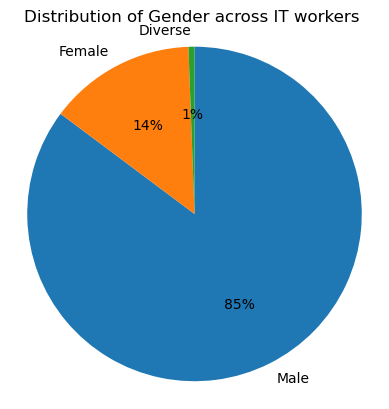

In [573]:
sorted_counts = df_sv20a['Gender'].value_counts()

plt.pie(sorted_counts, labels= sorted_counts.index, startangle= 90, autopct='%.0f%%',counterclock= False);
plt.title('Distribution of Gender across IT workers ')
plt.axis('square');

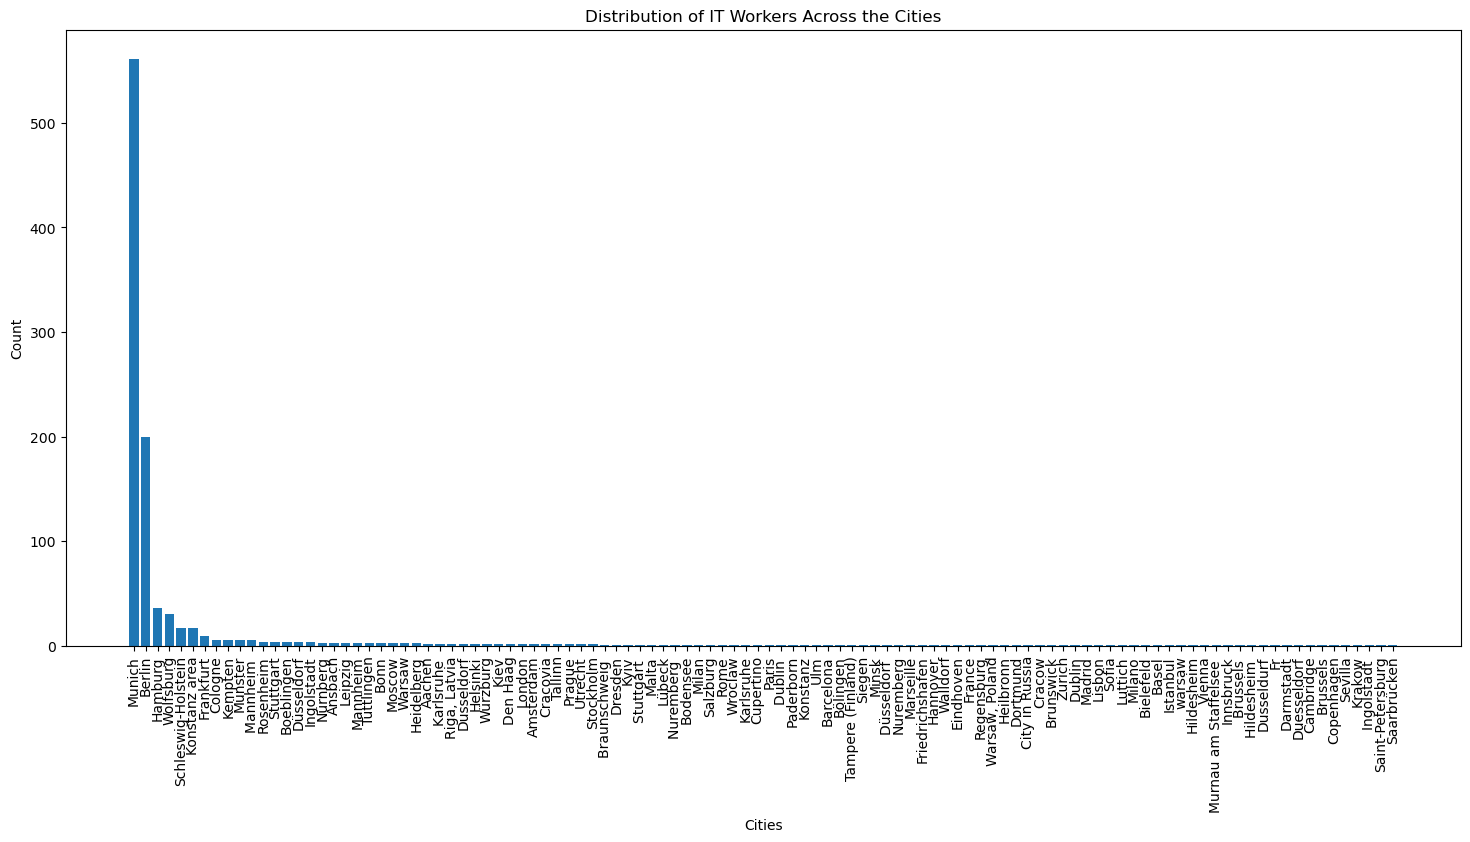

In [574]:
x= df_sv20a['City'].unique()
y= df_sv20a['City'].value_counts(sort= True)
plt.figure(figsize=(18, 8))
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.title('Distribution of IT Workers Across the Cities')
plt.xlabel('Cities')
plt.ylabel('Count');

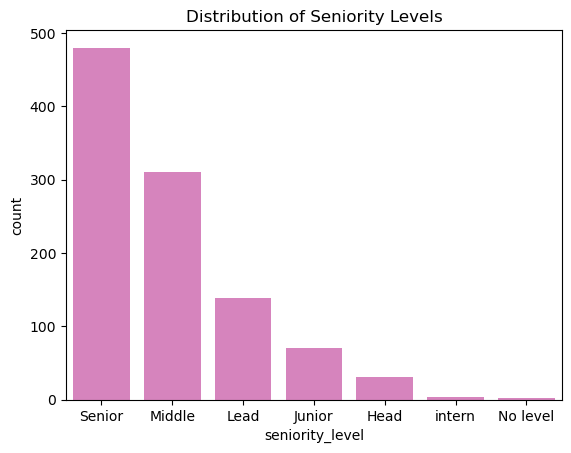

In [575]:
freq = df_sv20a['seniority_level'].value_counts()
sen_order = freq.index
sns.countplot(data=df_sv20a, x= 'seniority_level', color= sns.color_palette()[6], order =sen_order)
plt.title('Distribution of Seniority Levels');

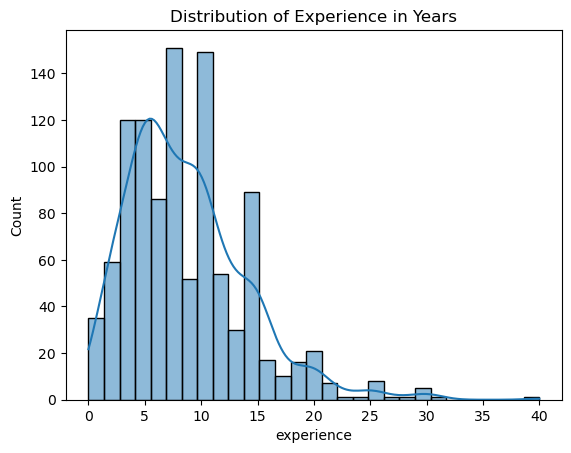

In [576]:
# Distribution of Experience
sns.histplot(df_sv20a['experience'], kde=True)
plt.title('Distribution of Experience in Years')
plt.show();

### 2.BIVARIATE VISUALIZATION

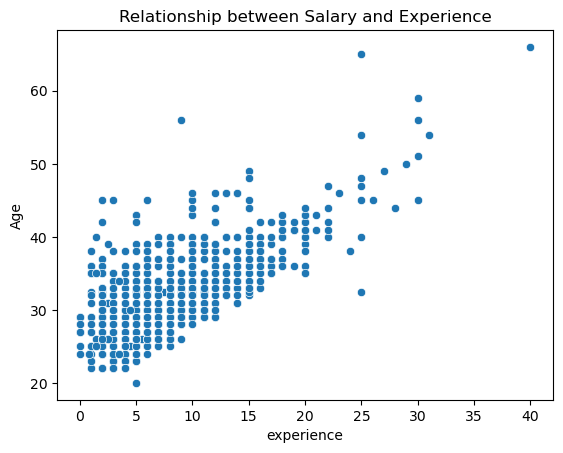

In [577]:

sns.scatterplot(data=df_sv20a, x='experience', y='Age')
plt.title('Relationship between Salary and Experience')
plt.show()


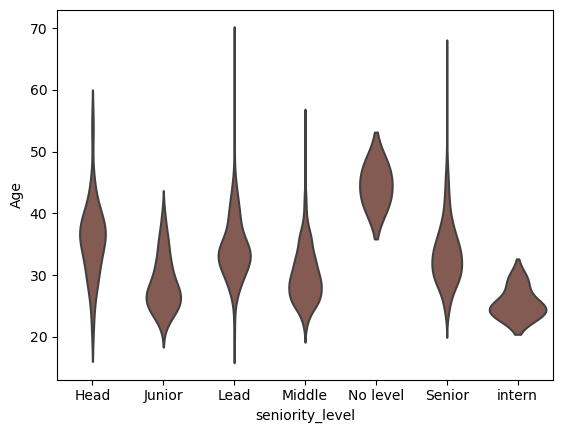

In [578]:
sns.violinplot(data=df_sv20a, x= 'seniority_level', y='Age', color= sns.color_palette()[5], inner= None);

In [579]:
df_sv20a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1035 entries, 0 to 1252
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Age                         1035 non-null   float64 
 1   Gender                      1035 non-null   category
 2   City                        1035 non-null   object  
 3   position                    1035 non-null   object  
 4   experience                  1035 non-null   float64 
 5   seniority_level             1035 non-null   category
 6   Main_PL                     1035 non-null   object  
 7   yearly_gross_salary_in_EUR  1035 non-null   float64 
 8   vacation_days               1035 non-null   float64 
 9   employment_status           1035 non-null   category
 10  contract_duration           1035 non-null   object  
 11  main_language_at_work       1035 non-null   object  
 12  company_size                1035 non-null   category
 13  company_type      

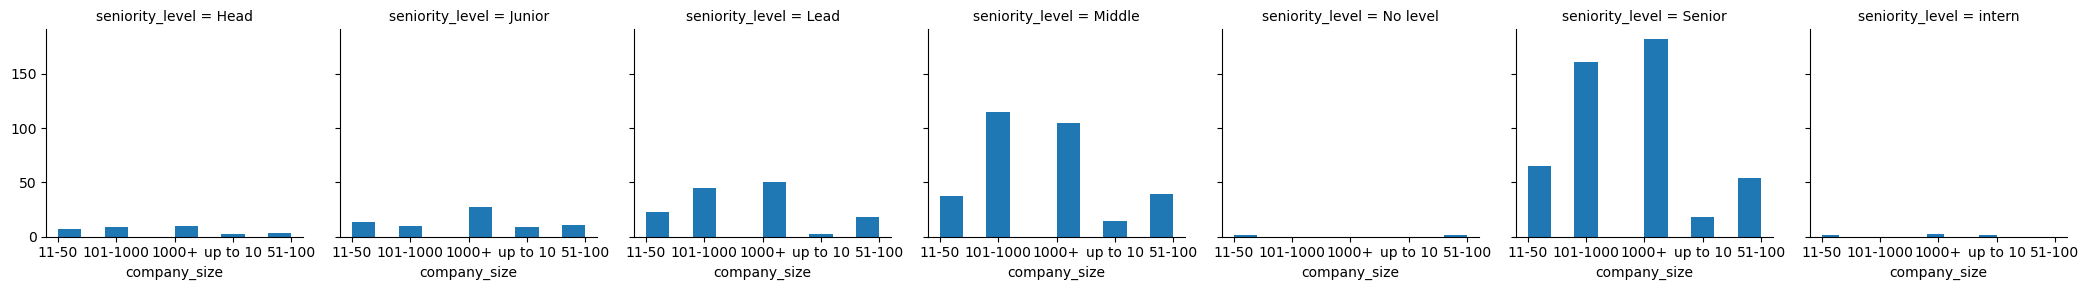

In [580]:
g=sns.FacetGrid(data=df_sv20a, col= 'seniority_level')
g.map(plt.hist, "company_size");

<AxesSubplot:>

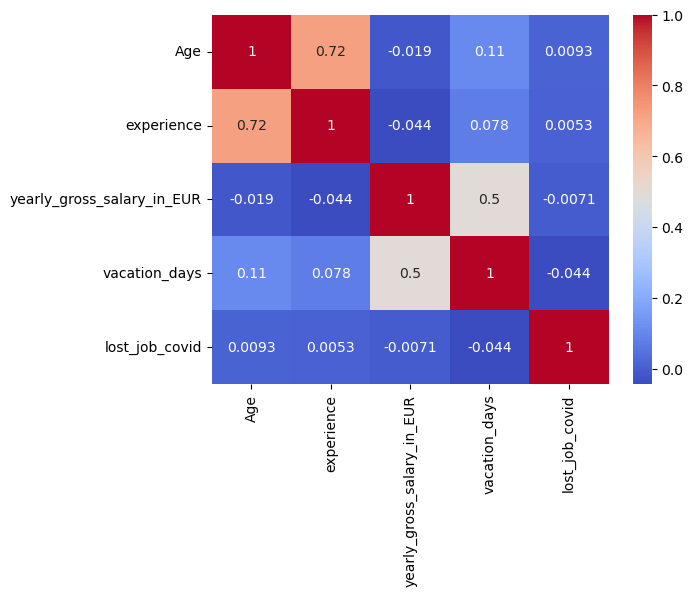

In [581]:
corr = df_sv20a.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

<Figure size 1000x800 with 0 Axes>

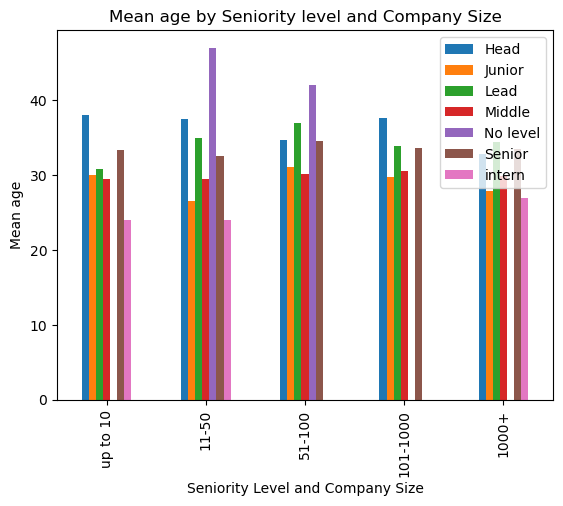

In [582]:
grouped = df_sv20a.groupby(['company_size', 'seniority_level'])['Age'].mean()
plt.figure(figsize =(10,8))
grouped.unstack().plot(kind='bar');

# Add plot labels
plt.legend(loc='upper right')
plt.title('Mean age by Seniority level and Company Size')
plt.xlabel('Seniority Level and Company Size')
plt.ylabel('Mean age')
plt.show();


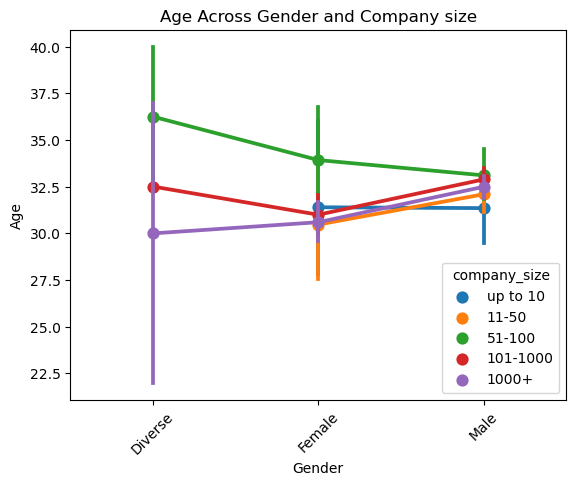

In [583]:
sns.pointplot(data=df_sv20a, x='Gender', y= 'Age', hue='company_size').set(title='Age Across Gender and Company size')
plt.xticks(rotation=45);